In [1]:
##read csv, make dataframe, get data set csvs for population density / general wealth level, make dataframes/lists, graph, profit

In [2]:
print("Easy peasy lemon squeezy.")

Easy peasy lemon squeezy.


In [22]:
#import
import os
import pandas as pd
import numpy as np
import json
import matplotlib
from pprint import pprint
from citipy import citipy
from scipy import stats
from datetime import datetime 
import matplotlib.pyplot as plt 
from matplotlib.dates import ( 
    DateFormatter, AutoDateLocator, AutoDateFormatter, datestr2num 
) 

In [23]:
#filepath and read_csv
#dataframe.head()

# File to Load (Remember to Change These)
uber_sep14 = "../uber-data/uber-raw-data-sep14.csv"
uber_jul14 = "../uber-data/uber-raw-data-jul14.csv"
uber_apr14 = "../uber-data/uber-raw-data-apr14.csv"


# Read Purchasing File and store into Pandas data frame
fall_df = pd.read_csv(uber_sep14)
summer_df = pd.read_csv(uber_jul14)
spring_df = pd.read_csv(uber_apr14)

In [24]:
uber_janfeb = "../uber-data/Uber-Jan-Feb-FOIL.csv"
twofer_df = pd.read_csv(uber_janfeb)

## splitting jan/feb into january and february.

In [25]:
jan_df = twofer_df.truncate(after = 185)
jan_df

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
181,B02512,1/31/2015,225,1892
182,B02617,1/31/2015,1394,15756
183,B02682,1/31/2015,1321,15388
184,B02764,1/31/2015,3947,44297


In [26]:
winterdates = jan_df.groupby("date").trips.sum()


winterdates_df = pd.DataFrame(winterdates)
winterdates_df = winterdates_df.sort_values(by = "date", axis = 0, ascending = True)
winterdates_df


## Separates winter data intro groups of days with amount of trips per day.

,trips
date,
1/1/2015,56437
1/10/2015,78484
1/11/2015,57026
1/12/2015,57646
1/13/2015,63499
1/14/2015,63329
1/15/2015,66729
1/16/2015,72480
1/17/2015,73363


In [27]:
## Removes the extra baseID from the January data, which had 6 instead of 5. Now it is consistent with the other sets.

jan_df = jan_df.loc[~jan_df["dispatching_base_number"].isin(["B02765"])]
jan_df.dispatching_base_number.value_counts()

B02764    31
B02617    31
B02598    31
B02512    31
B02682    31
Name: dispatching_base_number, dtype: int64

In [28]:
##split Date/Time into two columns, Date and Time
##Then group by dates and show orders per day.

fall_df['Date'] = ""
fall_df['Time'] = ""
fall_df[['Date','Time']] = fall_df["Date/Time"].str.split(" ",expand=True)

falldates = fall_df.groupby("Date").Lat.count()
falldates_df = pd.DataFrame(falldates)
falldates_df

,Lat
Date,
9/1/2014,19961
9/10/2014,35910
9/11/2014,36439
9/12/2014,39540
9/13/2014,43205
9/14/2014,28122
9/15/2014,29454
9/16/2014,36092
9/17/2014,35531


In [29]:
##split Date/Time into two columns, Date and Time
##Then group by dates and show orders per day.

spring_df['Date'] = ""
spring_df['Time'] = ""
spring_df[['Date','Time']] = spring_df["Date/Time"].str.split(" ",expand=True)

springdates = spring_df.groupby("Date").Lat.count()
springdates_df = pd.DataFrame(springdates)
springdates_df

,Lat
Date,
4/1/2014,14546
4/10/2014,20041
4/11/2014,20420
4/12/2014,18170
4/13/2014,12112
4/14/2014,12674
4/15/2014,20641
4/16/2014,17717
4/17/2014,20973


In [30]:
##split Date/Time into two columns, Date and Time
##Then group by dates and show orders per day.

summer_df['Date'] = ""
summer_df['Time'] = ""
summer_df[['Date','Time']] = summer_df["Date/Time"].str.split(" ",expand=True)

summerdates = summer_df.groupby("Date").Lat.count()
summerdates_df = pd.DataFrame(summerdates)
summerdates_df

,Lat
Date,
7/1/2014,21228
7/10/2014,30541
7/11/2014,28752
7/12/2014,25936
7/13/2014,21082
7/14/2014,27350
7/15/2014,33845
7/16/2014,28607
7/17/2014,30710


In [31]:
#Once the above are working, You can start graphing. X_values will be the length of the month's data in question
#bar graph for overall amounts and number comparison?


#Date by Amount for : April     Facet graph with "Spring and Summer"
#Date by Amount for : July


#Date by Amount for : September  Facet graph with "Fall and Winter"
#Date by Amount for : January

In [32]:
spring_fin_df = pd.DataFrame({"Date":springdates_df.index, "Amount":springdates_df["Lat"]})
spring_fin_df = spring_fin_df.reset_index(drop=True)
#df['Date'] =pd.to_datetime(df.Date)
spring_fin_df['Date'] = pd.to_datetime(spring_fin_df['Date'])
spring_fin_df = spring_fin_df.sort_values(by="Date")
spring_fin_df = spring_fin_df.reset_index(drop=True)
spring_fin_df

,Date,Amount
0,2014-04-01,14546
1,2014-04-02,17474
2,2014-04-03,20701
3,2014-04-04,26714
4,2014-04-05,19521
5,2014-04-06,13445
6,2014-04-07,19550
7,2014-04-08,16188
8,2014-04-09,16843
9,2014-04-10,20041


In [33]:
y_data_spring = spring_fin_df["Amount"]
x_axis_spring =spring_fin_df["Date"]

In [34]:
summer_fin_df = pd.DataFrame({"Date":summerdates_df.index, "Amount":summerdates_df["Lat"]})
summer_fin_df = summer_fin_df.reset_index(drop=True)
#df['Date'] =pd.to_datetime(df.Date)
summer_fin_df['Date'] = pd.to_datetime(summer_fin_df['Date'])
summer_fin_df = summer_fin_df.sort_values(by="Date")
summer_fin_df = summer_fin_df.reset_index(drop=True)
summer_fin_df

,Date,Amount
0,2014-07-01,21228
1,2014-07-02,26480
2,2014-07-03,21597
3,2014-07-04,14148
4,2014-07-05,10890
5,2014-07-06,11443
6,2014-07-07,18280
7,2014-07-08,25763
8,2014-07-09,27817
9,2014-07-10,30541


In [35]:
y_data_summer = summer_fin_df["Amount"]
x_axis_summer = summer_fin_df["Date"]

In [36]:
fall_fin_df = pd.DataFrame({"Date":falldates_df.index, "Amount":falldates_df["Lat"]})
fall_fin_df = fall_fin_df.reset_index(drop=True)
#df['Date'] =pd.to_datetime(df.Date)
fall_fin_df['Date'] = pd.to_datetime(fall_fin_df['Date'])
fall_fin_df = fall_fin_df.sort_values(by="Date")
fall_fin_df = fall_fin_df.reset_index(drop=True)
fall_fin_df

,Date,Amount
0,2014-09-01,19961
1,2014-09-02,28831
2,2014-09-03,32631
3,2014-09-04,38360
4,2014-09-05,42319
5,2014-09-06,40520
6,2014-09-07,30134
7,2014-09-08,30360
8,2014-09-09,34560
9,2014-09-10,35910


In [37]:
y_data_fall = fall_fin_df["Amount"]
x_axis_fall = fall_fin_df["Date"]

In [38]:
winter_fin_df = pd.DataFrame({"Date":winterdates_df.index, "Amount":winterdates_df["trips"]})
winter_fin_df = winter_fin_df.reset_index(drop=True)
#df['Date'] =pd.to_datetime(df.Date)
winter_fin_df['Date'] = pd.to_datetime(winter_fin_df['Date'])
winter_fin_df = winter_fin_df.sort_values(by="Date")
winter_fin_df = winter_fin_df.reset_index(drop=True)
winter_fin_df

,Date,Amount
0,2015-01-01,56437
1,2015-01-02,39189
2,2015-01-03,58449
3,2015-01-04,40798
4,2015-01-05,42752
5,2015-01-06,52426
6,2015-01-07,62102
7,2015-01-08,71413
8,2015-01-09,70296
9,2015-01-10,78484


In [41]:
y_data_winter = winter_fin_df["Amount"]
x_axis_winter = winter_fin_df["Date"]

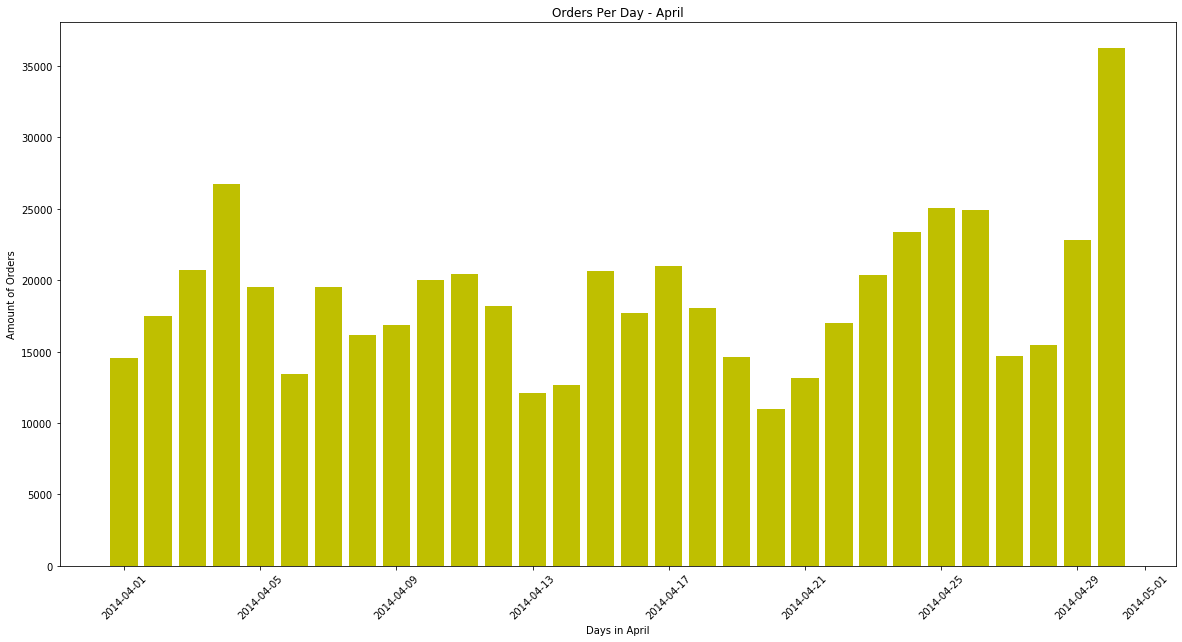

In [51]:
plt.figure(figsize=(20,10))
plt.bar(x_axis_spring, y_data_spring, color='y', align="center")
#tick_locations=[value for value in x_axis_spring]
#plt.xticks(tick_locations, [x_axis_spring])
plt.xticks(rotation=45)
plt.title("Orders Per Day - April")
plt.xlabel("Days in April")
plt.ylabel("Amount of Orders")
plt.show()

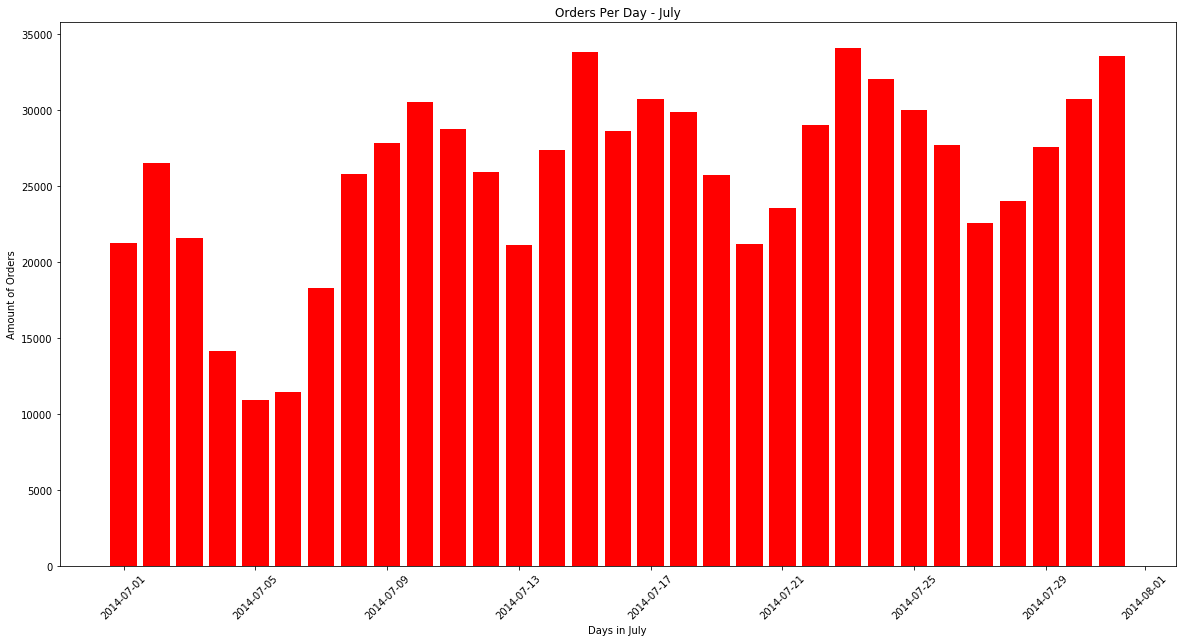

In [54]:
plt.figure(figsize=(20,10))
plt.bar(x_axis_summer, y_data_summer, color='r', align="center")
#tick_locations=[value for value in x_axis_spring]
#plt.xticks(tick_locations, [x_axis_spring])
plt.xticks(rotation=45)
plt.title("Orders Per Day - July")
plt.xlabel("Days in July")
plt.ylabel("Amount of Orders")
plt.show()

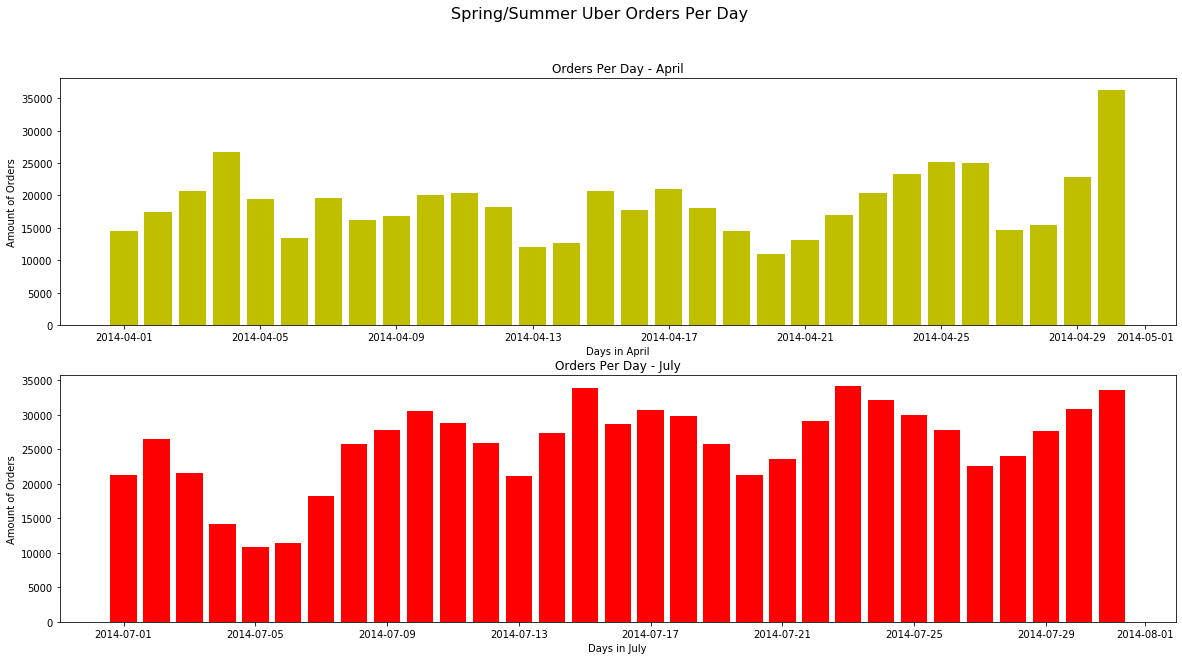

In [69]:
fig,(ax1,ax2) = plt.subplots(2,sharex=False, figsize=(20,10))
fig.suptitle("Spring/Summer Uber Orders Per Day",fontsize=16)


ax1.bar(x_axis_spring, y_data_spring, color='y', align="center")
ax1.set_title("Orders Per Day - April")
ax1.set_xlabel("Days in April")
ax1.set_ylabel("Amount of Orders")


ax2.bar(x_axis_summer, y_data_summer, color='r', align="center")
ax2.set_title("Orders Per Day - July")
ax2.set_xlabel("Days in July")
ax2.set_ylabel("Amount of Orders")



plt.show()

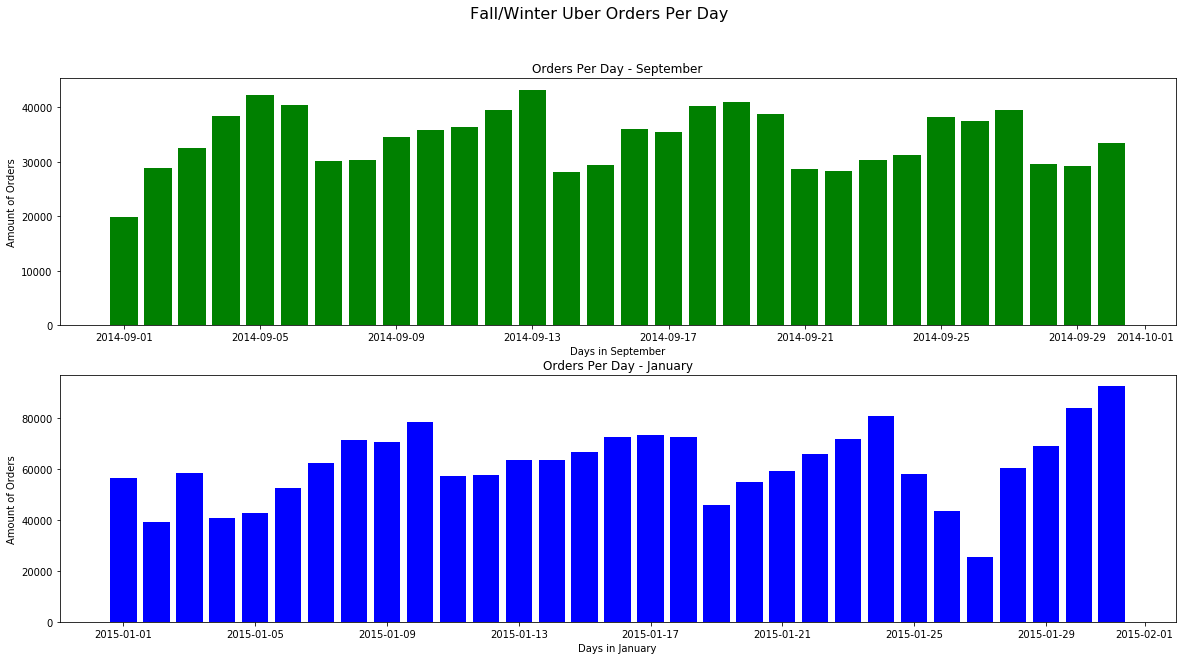

In [70]:
fig2,(ax3,ax4) = plt.subplots(2,sharex=False, figsize=(20,10))
fig2.suptitle("Fall/Winter Uber Orders Per Day",fontsize=16)


ax3.bar(x_axis_fall, y_data_fall, color='g', align="center")
ax3.set_title("Orders Per Day - September")
ax3.set_xlabel("Days in September")
ax3.set_ylabel("Amount of Orders")


ax4.bar(x_axis_winter, y_data_winter, color='blue', align="center")
ax4.set_title("Orders Per Day - January")
ax4.set_xlabel("Days in January")
ax4.set_ylabel("Amount of Orders")



plt.show()